In [2]:
import pandas as pd

# we'll use this later
df = pd.read_csv("data/ice_release_jul2025/ice_detentions.csv", header = 6)

# some initial cleaning
df["Book In Date Time"] = pd.to_datetime(df["Book In Date Time"])
df["Detention Book Out Date Time"] = pd.to_datetime(df["Detention Book Out Date Time"])

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592322 entries, 0 to 592321
Data columns (total 37 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   Stay Book In Date Time                     592322 non-null  object        
 1   Book In Date Time                          592322 non-null  datetime64[ns]
 2   Detention Facility                         592322 non-null  object        
 3   Detention Facility Code                    592322 non-null  object        
 4   Detention Book Out Date Time               590145 non-null  datetime64[ns]
 5   Stay Book Out Date Time                    584945 non-null  object        
 6   Detention Release Reason                   590145 non-null  object        
 7   Stay Book Out Date                         584945 non-null  object        
 8   Stay Release Reason                        584945 non-null  object        
 9   Reli

In [4]:
print(df.columns[:8])
print(df.columns[8:16])
print(df.columns[16:24])
print(df.columns[24:30])
print(df.columns[30:])

Index(['Stay Book In Date Time', 'Book In Date Time', 'Detention Facility',
       'Detention Facility Code', 'Detention Book Out Date Time',
       'Stay Book Out Date Time', 'Detention Release Reason',
       'Stay Book Out Date'],
      dtype='object')
Index(['Stay Release Reason', 'Religion', 'Gender', 'Marital Status',
       'Birth Date', 'Birth Year', 'Ethnicity', 'Entry Status'],
      dtype='object')
Index(['Felon', 'Bond Posted Date', 'Bond Posted Amount', 'Case Status',
       'Case Category', 'Final Order Yes No', 'Final Order Date',
       'Case Threat Level'],
      dtype='object')
Index(['Book In Criminality', 'Final Charge', 'Departed Date',
       'Departure Country', 'Initial Bond Set Amount', 'Citizenship Country'],
      dtype='object')
Index(['Final Program', 'Most Serious Conviction (MSC) Charge Code',
       'MSC Charge', 'Alien File Number', 'EID Case ID', 'EID Subject ID',
       'Unique Identifier'],
      dtype='object')


# Histograms

First we'll look at a couple of simple histograms. The first thing I do when I
look at a variable is make histograms. Histograms are a type of bar plot that
show how frequent different values are for some variable.

## Continuous Histograms

Typically, when we think about histograms, we're thinking of continuous
histograms. With continuous data we definitially cannot enumerate all possible
values the variable can take. Instead the values are placed into bins and the
number of observations for each bin is counted.


<Axes: >

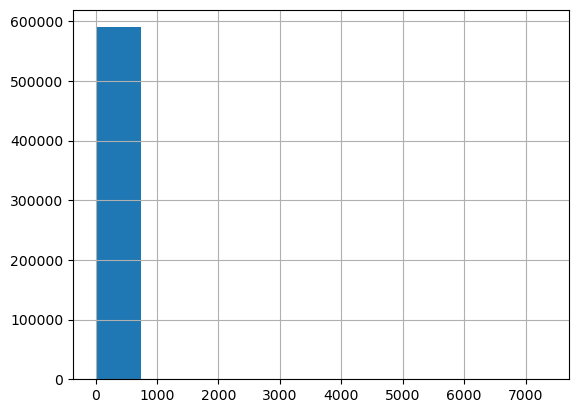

In [5]:
# select only a subset of columns that we need
hist_df = df[["Book In Date Time",
              "Detention Book Out Date Time",
              "Birth Year",
              "Ethnicity"]].copy()

# compute a new column, days in detention
# that .dt.days but at the end tells pandas we want a number with the units days
hist_df["days_in_detention"] = (hist_df["Detention Book Out Date Time"] - hist_df["Book In Date Time"]).dt.days

# for really basic stuff we can just use pandas directly
hist_df["days_in_detention"].dropna().hist()

Ok so this sucks obviously. I don't like the grid, our axes aren't labelled,
the bins are wide as hell (like two years),
and it looks really fucked up overall. Previously, we learned about so-called
"heavy-tailed" distributions where we find really large values compared to the
typical values. We can deal with this to some extent using `pandas` alone, but
one way or another, we're going to run into the better options for plotting.
From here on out we will not use `pandas` for making figures.

We will use a pair of libraries. First, and most importantly,
`matplotlib` which is the core plotting library used by `pandas` as well as the
package we will get to later `seaborn`. Like it or not, whenever we make
figures in python we will be using `matplotlib`.

Let's remake our histogram using `matplotlib` directly. and deal with some of
these issues.

### A quick note on `matplotlib`

We can tell at this point that there are many ways to make figures in python.
I'm going to illustrate only the way that I believe is best, "object 
oriented" `matplotlib` and its extension into `seaborn`. As you learn you will 
certainly see other ways of doing things, if you are ever confused, please ask.

This approach is more verbose than other options and later on I will use them.
For now we will stick with the object-oriented approach. Whenever we make a
plot this way we will first initialize the objects of it all. We do this with:

```
fig, ax = plt.subplots()
```

This gives us two objects, `fig` and `ax`. `fig` is essentially the frame that
our plot will live in. We won't use it much except to to save our plots
plots as files. `ax` is the plot itself. We will use it a lot.

You might notice that the function we called to make these objects is called
subplots, this is because we can actually put multiple plots in the same figure
if we want. We'll get into that later.

The other thing we will always do is finish our figures with `plt.show()`. This
will display our figure and close it so we don't accidentally make changes to
it after the fact.

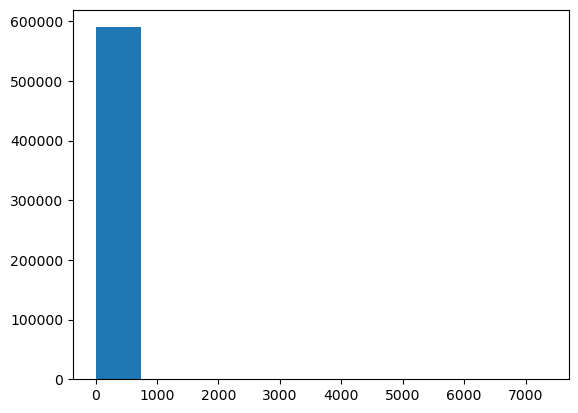

In [6]:
# strictly speaking we're importing a "submodule" pyplot and giving it the
# alias 'plt'. This is the standard way of doing it.
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

# to recreate our figure we use the `hist()` method of `ax``
ax.hist(hist_df["days_in_detention"])

plt.show()

Obviously, this did not fix any of our problems from the pandas approach. Using
the tools of `matplotlib` we can very easily change all of this.

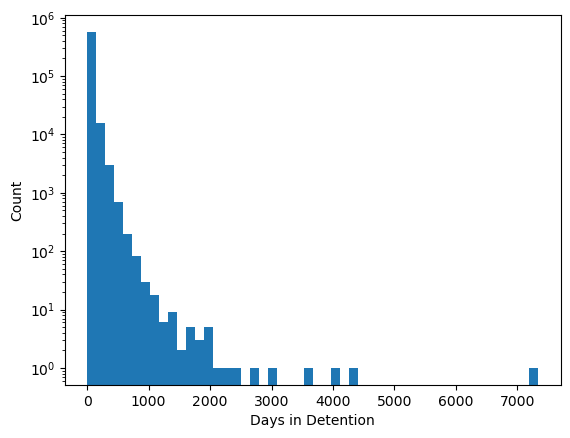

In [7]:
fig, ax = plt.subplots()

# put our y-axis on a log scale with log=True
# use more, smaller bins with bins=50
ax.hist(hist_df["days_in_detention"], log=True, bins=50)

# now we'll give our axes some meaningful names
ax.set_xlabel("Days in Detention")
ax.set_ylabel("Count")

plt.show()


Now we can see whats going on way better. We do, in fact, see that the shortest
detentions are the most common but we also can now clearly see that they are by
no means all thats going on. There are a meaningful number of detentions that
last an extremely long time. We can see a handful of cases where detention
lasted more than a decade and hundreds that went on for a years. In this case we might want to put the x-axis on a log scale as well but thats a bit more work.

Good enough for now.

## Discrete Histograms

Next we'll look at discrete distributions. In the discrete case, we often can
enumerate all possible values. When we can, we should. It eliminates the loss
of resolution we get with binning. Once again we'll have to compute a column.
This time we'll look at the ages of folks when they first get detained.

We also won't use `hist()` for this because `hist()` makes bins. Instead we
will use `bar()`. We have to get the x and y values ahead of time to
pull this off.

   age_at_detention  count
0                25  24861
1                26  24324
2                24  24004
3                27  23750
4                28  23285


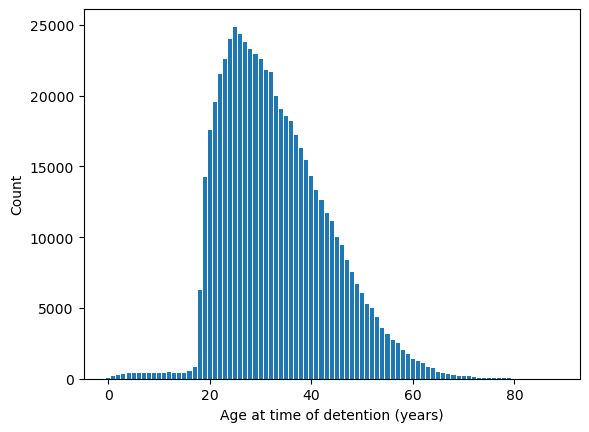

In [8]:
hist_df["age_at_detention"] = hist_df["Book In Date Time"].dt.year - hist_df["Birth Year"]

# resetting the index to get a proper column for age
age_counts = hist_df["age_at_detention"].value_counts().reset_index()
print(age_counts.head())


fig, ax = plt.subplots()
ax.bar(age_counts["age_at_detention"], age_counts["count"])
ax.set_xlabel("Age at time of detention (years)")
ax.set_ylabel("Count")
plt.show()

To my surprise, we find a weirdly smooth pattern here. The most common age for
ICE detentions is somethere in the 20s. with most of the dentions being in a
relatively narrow 20~40 range that falls off pretty linearly into old age.

## Really, really discrete histograms and bar plots

Sometimes our data aren't things that can be put in order like numbers. In the
ICE dataset we have a lot of columns like this. That doesn't mean that we
don't care about how frequent our different values are. We can still make
histograms the same way, they'll just look a little different. They will look
like the bar plots that you have surely seen before. In general, I am a bar
plot hater, but sometimes they are fine.

Let's make a histogram of one of our **categorical** variables, the felon
status received by detainees. One difference we will make is that we will
show our bars horizontally instead of vertically. We do this mostly so the
labels of the categories dont overlap.

This time we'll also convert the raw counts into frequencies. Strictly speaking,
this is a required step of a histogram but we often skip it because it usually
doesn't matter. It doesn't matter here either.

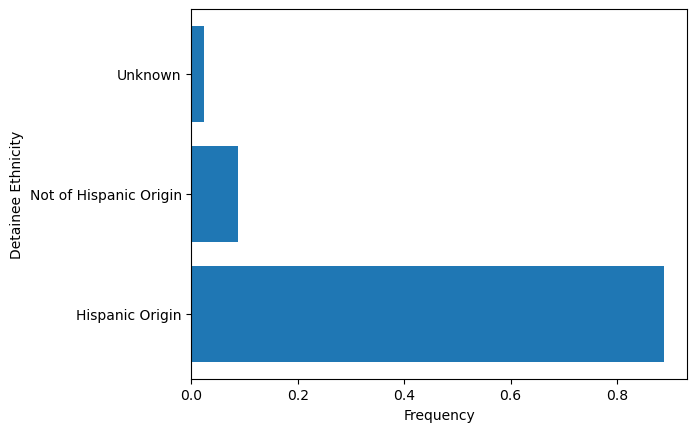

In [9]:
# process is identical to ordered discrete histograms
country_counts = df["Ethnicity"].value_counts().reset_index()

# calculate frequencies
frequencies = country_counts["count"] / country_counts["count"].sum()

fig, ax = plt.subplots()
ax.barh(country_counts["Ethnicity"], frequencies)
ax.set_xlabel("Frequency")
ax.set_ylabel("Detainee Ethnicity")
plt.show()

Not a surprise to anyone, people of Hispanic origin are the overwhelming
majority of detainees. Note that the histogram is shown with the largest bar
at the bottom. `value_counts()` does this ordering for you.

Before we move on from bar-as-mapping let's do a bar plot that is not a
histogram. We'll use our same categories but this time let's calulate the
mean detention time for each group. We will use another feature of pandas,
`groupby()`. This dataframe method makes it easy to calculate summary
statistics based on groups contained in some column. In this case "Ethnicity"
has our groups and we just want the means of the "days_in_detention" column so
we'll pull those two columns out ahead of the grouping.

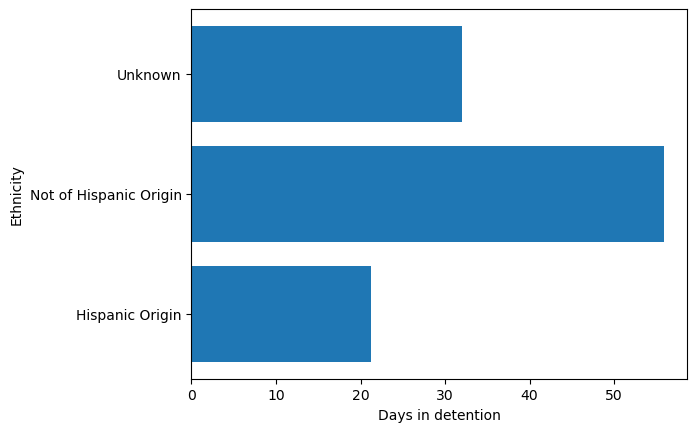

In [10]:
bar_df = hist_df[["Ethnicity", "days_in_detention"]]
means = bar_df.groupby("Ethnicity").mean().reset_index()

fig, ax = plt.subplots()

ax.barh(means["Ethnicity"], means["days_in_detention"])

ax.set_xlabel("Days in detention")
ax.set_ylabel("Ethnicity")

plt.show()


Weird! Folks without Hispanic origins are in detention on average way longer. 
There's a lot of reasons this could be and I'm not sure this is the place to
get into it. Remember though, that our distribution was extremely weird. Its
very likely that those extreme values are pulling the main up a ton.

Note also that we've successfully plotted three data points in the above
figure. Usually, we can do better than using giant bars to plot three data
points.

# Line Plots

Another classic type of figure you see all over the place is the line plot.
`matplotlib` calls this `plot()`. Line plots are very useful for plotting
datapoints that are connected in some way, often by time. Let's look at the line
plot showing us the number of detentions per month.

We're going to use `Grouper` from `pandas` to turn our data into monthly counts.
`Grouper` is really useful for making groups with `groupby()` especially when
we're working with time.

  Book In Date Time  Ethnicity
0        2004-12-31          0
1        2005-01-31          0
2        2005-02-28          0
3        2005-03-31          0
4        2005-04-30          0


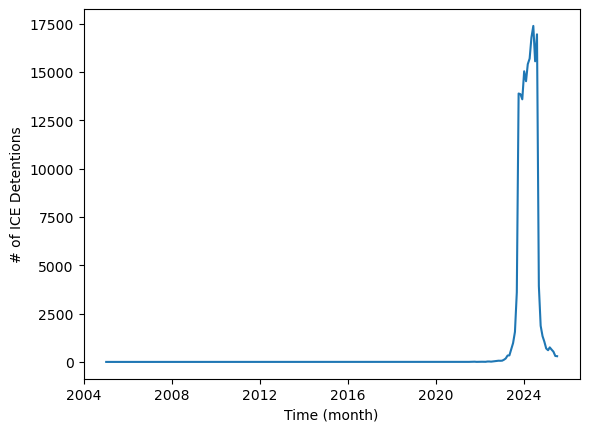

In [11]:
line_df = df[["Book In Date Time",
              "Ethnicity"]].copy()


# Grouper asks on the index of a dataframe so we want our time column as index
time_df = line_df.set_index("Book In Date Time")


# grouper is easy to use! 'ME' is for 'month end'
detentions_per_month = time_df.groupby(pd.Grouper(freq='ME')).count().reset_index()

print(detentions_per_month.head())

# we have to choose a column to take our count from Ethnicity is our only 
# other column so we'll choose that
months = detentions_per_month["Book In Date Time"]
counts = detentions_per_month["Ethnicity"]

fig, ax = plt.subplots()

ax.plot(months, counts)
ax.set_xlabel("Time (month)")
ax.set_ylabel("# of ICE Detentions")

plt.show()

We shouldn't be too caught up with this specific result. We're working with
FOIA'd data that simply doesn't have a good sense for how these numbers actually
look going 20 years back. It's also not as caught up as it could be. This data
is part of a project called The Deportation Data Project and they are working
to fill these gaps. So far in this dataset only 2023-2024 are thought to be
complete. They also offer 2012-2013 data on their website separately.

Let's zoom in on our complete region and take a look at what it looks like when
we draw multiple lines on the same plot. All we have to do is call `plot()`
for each line we want to draw. We'll calculate the lines beforehand. We'll
also add a legend to our plot. Adding the legend is a simple as calling
`ax.legend()` somewhere before `plt.show()` but in order to fill it with useful
information, we will add a `label` to each call to `plot()`.

/tmp/ipykernel_19206/133495119.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


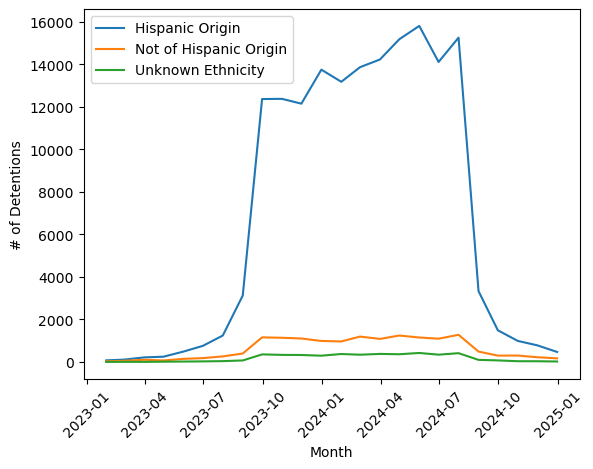

In [12]:
# set some endpoints for our date range we're interested in
# we need to convert these to Datetime objects
start_date = pd.to_datetime("2023-01-01", format="%Y-%m-%d")
end_date = pd.to_datetime("2024-12-31", format="%Y-%m-%d")

# having these end points as datetimes makes logical operators work
covered_df = line_df[(line_df["Book In Date Time"] >= start_date) &  # pandas requires us to use '&' and '|'
                     (line_df["Book In Date Time"] <= end_date)]

# set the index to "Book In Date Time" for Grouper again
covered_df = covered_df.set_index("Book In Date Time")

# now we will break out each ethnicity category into its own dataframe
# we could do this with a fancy groupby but those always confuse me
hispanic = covered_df[covered_df["Ethnicity"] == "Hispanic Origin"]
nonhispanic = covered_df[covered_df["Ethnicity"] == "Not of Hispanic Origin"]
unknown = covered_df[covered_df["Ethnicity"] == "Unknown"]

# ts for timeseries
hispanic_ts = hispanic.groupby(pd.Grouper(freq="ME")).count()
nonhispanic_ts = nonhispanic.groupby(pd.Grouper(freq="ME")).count()
unknown_ts = unknown.groupby(pd.Grouper(freq="ME")).count()

fig, ax = plt.subplots()

# just going to use index directly rather than set our time to its own axis
ax.plot(hispanic_ts.index, hispanic_ts["Ethnicity"], label="Hispanic Origin")
ax.plot(nonhispanic_ts.index, nonhispanic_ts["Ethnicity"], label="Not of Hispanic Origin")
ax.plot(unknown_ts.index, unknown_ts["Ethnicity"], label="Unknown Ethnicity")

ax.set_xlabel("Month")
# put our dates on an angle so they all fit
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("# of Detentions")
ax.legend()

plt.show()


Again, not exactly clear how meaningful this is. The dramatic difference in 
the overall height between, like, september 2023 and august 2024 suggests to 
me that really thats the region for which we have good data. It would be 
interesting to figure out when democrats "got tough on immigration" and add 
some time based markers on there. Some of the effects could very well be 
Biden's deportation regime leading up to the election. The Data is Plural
archive has some datasets about news topics and one could grab those to look
at when that rhetoric was peaking.

Rather than spend more time trying to sort this out now, we will instead move
on to our other main type of plot.

## Scatter Plot

Scatter plots represent data as disconnected points on our axes. They are
in some sense the most general kind of plot we will be using. Everything we
have looked at so far could be represented using dots and instead we've simply
used what is most conventional. The nice thing about scatter plots is that if we
end up as a big cloud of points, thats ok. we don't need a neat line or curve
of points as we've seen with the other types.

Our ICE dataset doesn't have a pair of columns that sound particularly
interesting to plot on a scatter plot so once again, we're going to compute
some columns of our own. I want to look at detention facilities, so let's make
a plot where each dot is a detention facility and its position is given in
terms of average days in detention and average bond set. Let's see if we can
find the worst prison.

<class 'pandas.core.series.Series'>
RangeIndex: 592322 entries, 0 to 592321
Series name: Initial Bond Set Amount
Non-Null Count  Dtype  
--------------  -----  
35674 non-null  float64
dtypes: float64(1)
memory usage: 4.5 MB
None


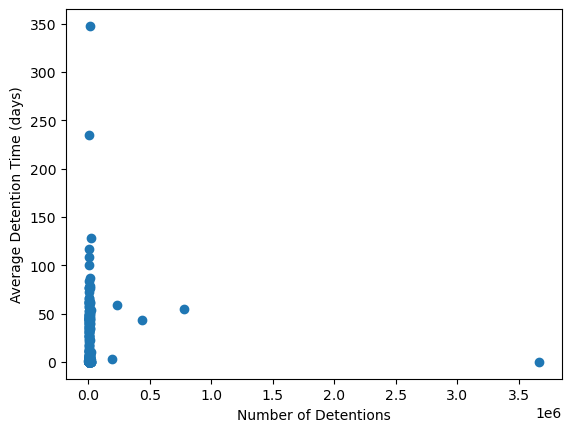

In [13]:
scatter_df = df[["Book In Date Time",
                 "Detention Book Out Date Time",
                 "Detention Facility",
                 "Initial Bond Set Amount"]].copy()

scatter_df["days_in_detention"] = (scatter_df["Detention Book Out Date Time"] - scatter_df["Book In Date Time"]).dt.days

# I want to know how many non-NA values we have
print(scatter_df["Initial Bond Set Amount"].info())

# its not a lot but thats ok hopefully we can work with it!
prison_means = scatter_df.groupby("Detention Facility").mean()
prison_counts = scatter_df.groupby("Detention Facility").count()  # not sure we need this but it might be handy

fig, ax = plt.subplots()

ax.scatter(prison_means["Initial Bond Set Amount"], prison_means["days_in_detention"])

ax.set_xlabel("Number of Detentions")
ax.set_ylabel("Average Detention Time (days)")

plt.show()

Pretty fucked up looking. I guess someone had their bond set at $3.5 million but they paid it quickly?
Thats pretty weird, lets take a quick detour from data vizualization to check that out

In [14]:
expensive = df[df["Initial Bond Set Amount"] == df["Initial Bond Set Amount"].max()]

print(expensive[["Initial Bond Set Amount", "Detention Facility", "Stay Book Out Date Time", "Detention Release Reason"]])

        Initial Bond Set Amount           Detention Facility  \
348401              208547734.0     CHARLESTON, SC HOLD ROOM   
348403              208547734.0     STEWART DETENTION CENTER   
348405              208547734.0            FOLKSTON MAIN IPC   
348407              208547734.0  ALEXANDRIA STAGING FACILITY   
348409              208547734.0     WINN CORRECTIONAL CENTER   

       Stay Book Out Date Time Detention Release Reason  
348401         05/31/2024 4:30              Transferred  
348403         05/31/2024 4:30              Transferred  
348405         05/31/2024 4:30              Transferred  
348407         05/31/2024 4:30                  Removed  
348409         05/31/2024 4:30              Transferred  


Holy shit there's five of them and their bond was set to $208 million. First of
all that can't possibly be real, second of all, googling these facilities makes
it clear that these are where you are sent before you get deported. It seems like
the Alexandria Staging Facility is one of the places they directly leave from.
I'm guessing thats why we see "Removed" (code for deported in this dataset) for
that place only. The other locations are all in the south and the "transfer" in
question is maybe to Alexandria for deportation?

I want to see if the outlier facility on our scatter plot is Alexandria.

In [15]:
prison_means[prison_means["Initial Bond Set Amount"] == prison_means["Initial Bond Set Amount"].max()]

,Book In Date Time,Detention Book Out Date Time,Initial Bond Set Amount,days_in_detention
Detention Facility,,,,
"CHARLESTON, SC HOLD ROOM",2024-03-14 03:04:55.113122048,2024-03-14 06:38:13.981900544,3.665320e+06,0.027149


Charleston, SC. One of the ones we saw with the outrageous bond. Well, in any
case I think we should toss that point out because there's no way that the
$3.5 million average bond is meaningful.

I think that even with Charleston hold room removed we're still going to see some
extremely skewed numbers. We still have the other four facilities above with
the extremely large bond amount. We should try plotting the log of the bond
amount instead.

We're going to use yet another library to do that.

### Sneak peak: numpy

`numpy` is a library for working with numbers in pythons. Under the hood, pandas
is like 70% `numpy` by volume. There are many things we can and will do with
`numpy` but one of the very common ones, especially for visualization is
log-transforming a dataframe column. We do this with `np.log()` which by
default takes the natural log. For whatever reason when we're programming
we usually call the natural log of x (written $\ln(x)$ in math world) as
`log(x)` and the base-10 log (written $\log(x)$ in math) as `log10(x)`.

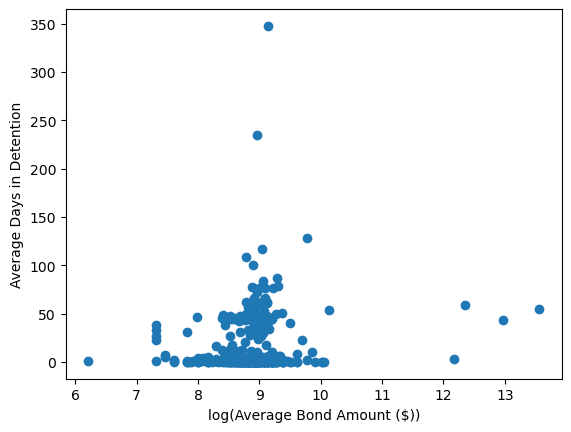

In [16]:
import numpy as np

# drop the outlier point
clean_means = prison_means.drop("CHARLESTON, SC HOLD ROOM", axis="index")
clean_counts = prison_counts.drop("CHARLESTON, SC HOLD ROOM", axis="index")


fig, ax = plt.subplots()

ax.scatter(np.log(clean_means["Initial Bond Set Amount"]), clean_means["days_in_detention"])
ax.set_xlabel("log(Average Bond Amount ($))")
ax.set_ylabel("Average Days in Detention")

plt.show()

We can see whats going on at least a little bit better now. It doesn't look
like there is a relationship between these variables to me but there are still
things we can learn. First, in terms of average bonds, it looks like most values
are somewhere around 9 on our log scale. to rescale that back to our original
scale we take $e^9 \approx 8000$. Days in detention seems basically completely
independent, most stays are short while some are long regardless of bond.

The other thing we can learn is that we have a bad **overplotting** problem.
This is the situation in which our marks that contain information are hard to
read because they are all on top of one another. This can occur in all kind of
plots (though typically not straightforward bar plots). There are many
approaches we can take to deal with this but we'll look at the two simplest ways
here.

First, we will replace the filled circles in our plot with empty circles.

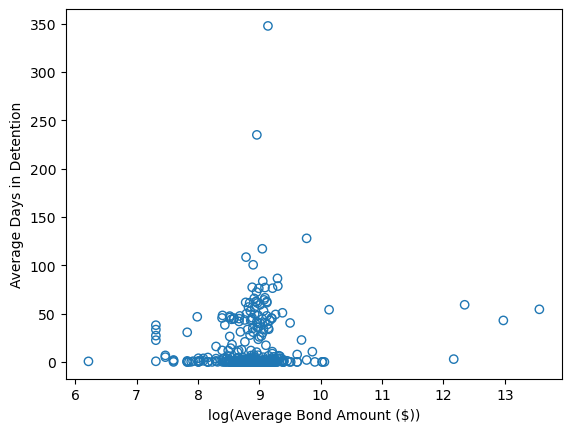

In [17]:
fig, ax = plt.subplots()

# we'll pass in values for facecolors and edgecolors to make empty circles
ax.scatter(np.log(clean_means["Initial Bond Set Amount"]),
           clean_means["days_in_detention"],
           facecolors="none",
           edgecolors="C0")  # color[0] in python's default color scheme
ax.set_xlabel("log(Average Bond Amount ($))")
ax.set_ylabel("Average Days in Detention")

plt.show()

This helps a little. We can see now that the cluster of points lying very
close to 0 days in detention is denser than the one near 50 days. We can take
This a step further, however, and make the markers slightly transparent.

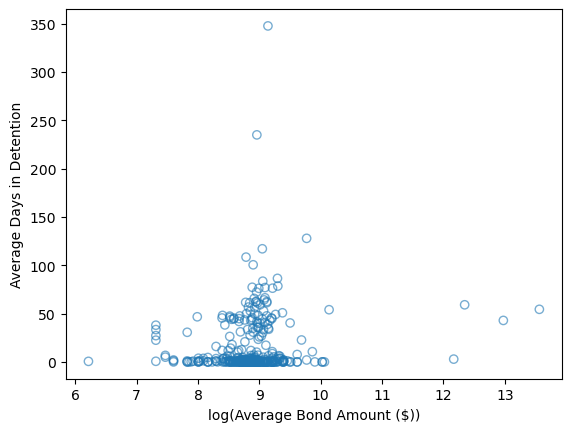

In [18]:
fig, ax = plt.subplots()

# we'll pass in values for facecolors and edgecolors to make empty circles
ax.scatter(np.log(clean_means["Initial Bond Set Amount"]),
           clean_means["days_in_detention"],
           facecolors="none",
           edgecolors="C0",
           alpha=0.6)  # color[0] in python's default color scheme
ax.set_xlabel("log(Average Bond Amount ($))")
ax.set_ylabel("Average Days in Detention")

plt.show()


Well maybe it helps a little, at least.

One final note on scatter plots before we move on to more big picture
visualization stuff. Like other kinds of plots, as we did for the line plot,
we can put an additional set of data on top. This can be essential in making
our scatter plots meaningful.

Let's remake this figure with data from our complete time period 
(nominally 2023-2024) with a distinct appearance from the less reliable data.

We'll break out two dataframes, one for complete data and one for incomplete
and go from there.

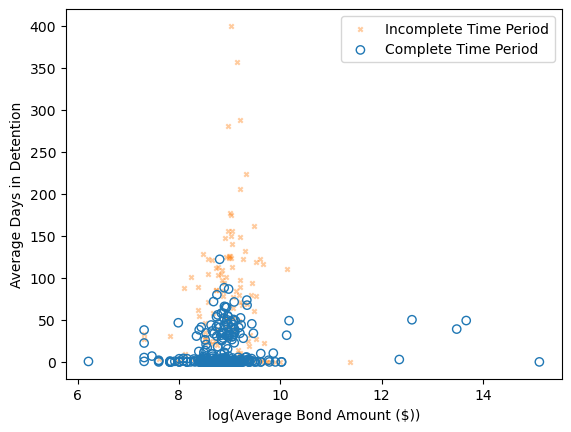

In [21]:
# lets narrow the range to what it looked like on the line plot
# something like september 2023-august 2024
start_date = pd.to_datetime("2023-09-01", format="%Y-%m-%d")
end_date = pd.to_datetime("2024-08-31", format="%Y-%m-%d")

complete_scatter = scatter_df[(scatter_df["Book In Date Time"] >= start_date) &
                              (scatter_df["Book In Date Time"] <= end_date)]

# for incomeplete data we'll just do the opposite logical operation
incomplete_scatter = scatter_df[(scatter_df["Book In Date Time"] < start_date) |  # this is 'or'
                                (scatter_df["Book In Date Time"] > end_date)]

complete_means = complete_scatter.groupby("Detention Facility").mean()
incomplete_means = incomplete_scatter.groupby("Detention Facility").mean()

fig, ax = plt.subplots()

# we do incomplete first so it goes on the bottom layer visually
# one we're going to do more to minimize its visual impact
ax.scatter(np.log(incomplete_means["Initial Bond Set Amount"]),
           incomplete_means["days_in_detention"],
           marker="x",  # shape of the marker
           s=10,        # size of the markers
           color="C1",
           alpha=0.4,
           label="Incomplete Time Period")

# for complete data we'll make empty circles but otherwise leave it alone
ax.scatter(np.log(complete_means["Initial Bond Set Amount"]),
           complete_means["days_in_detention"],
           edgecolors="C0",
           facecolors="none",
           label="Complete Time Period")

ax.set_xlabel("log(Average Bond Amount ($))")
ax.set_ylabel("Average Days in Detention")
ax.legend()

plt.show()

I'm not sure we learned much new other than that the averages for days in
detention appear to have been pulled up by the less reliable data while the
opposite is true for the bond amounts.